# Creating Your Linear Regression Model

**=================================================================================================================**

## Project Description

In this peer reviewed assignment, you’ll use a real-world Boston housing dataset and step-by-step Principal Component Analysis (PCA) to reduce the dimension of a large data set without losing important information necessary for quality analysis.  Then, you’ll run a linear regression model and interpret your results. 

You’ll evaluate your model’s performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and the Root Mean Squared Error (RMSE).

Completing the tasks in the Capstone will allow you to understand how and why we use PCA on datasets and give you insight into the linear algebra that lies behind PCA. You’ll also understand how to set up, run, and interpret a linear regression model.

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm


import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict, RandomizedSearchCV, StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.inspection import permutation_importance

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**=================================================================================================================**

## Quick Data Glance

In [2]:
df = pd.read_csv("housingscaled.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.42,0.28,-1.29,-0.27,-0.14,0.41,-0.12,0.14,-0.98,-0.67,-1.46,0.44,-1.08,24.00
1,-0.42,-0.49,-0.59,-0.27,-0.74,0.19,0.37,0.56,-0.87,-0.99,-0.30,0.44,-0.49,21.60
2,-0.42,-0.49,-0.59,-0.27,-0.74,1.28,-0.27,0.56,-0.87,-0.99,-0.30,0.40,-1.21,34.70
3,-0.42,-0.49,-1.31,-0.27,-0.84,1.02,-0.81,1.08,-0.75,-1.11,0.11,0.42,-1.36,33.40
4,-0.41,-0.49,-1.31,-0.27,-0.84,1.23,-0.51,1.08,-0.75,-1.11,0.11,0.44,-1.03,36.20


In [4]:
df.shape

(506, 14)

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='object')

**=================================================================================================================**

**=================================================================================================================**

##  Linear Regression 

Let's first understand what exactly `Regression` means it is a statistical method used in finance, investing, and other disciplines that attempts to determine the `strength` and `character` of the relationship between one `dependent variable` (usually denoted by `Y`) and a series of other variables known as `independent variables`.   
`Linear Regression` is a statistical technique where based on a set of `independent variable(s)` a dependent variable is `predicted`. 

$$\huge y_{i} =\beta _{0} + \beta _{1} X_{i} + \varepsilon_{i}$$

y = dependent variable     
$ \beta_{0}$ = population of intercept    
$ \beta_{i}$ = population of co-efficient   
x = independent variable    
$ \varepsilon_{i}$ = Random error   


**=================================================================================================================**

# Multiple Linear Regression 
It(as the name suggests) is characterized by `multiple independent variables` (more than `1`). While you discover the simplest `fit line`, you'll be able to adjust a `polynomial or regression` toward the `mean`. And these are called `polynomial or regression` toward the `mean`.

## Multiple Linear Regression (StatsModel)

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets `[[]]`, and listing the names of the columns of interest.

In [6]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [7]:
X.values, y.values

(array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
          0.44105193, -1.0755623 ],
        [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
          0.44105193, -0.49243937],
        [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
          0.39642699, -1.2087274 ],
        ...,
        [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
          0.44105193, -0.98304761],
        [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
          0.4032249 , -0.86530163],
        [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
          0.44105193, -0.66905833]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
   

In [8]:
X = sm.add_constant(X)

In [9]:
mlrmodel = sm.OLS(y,X).fit()

In [10]:
mlrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          6.72e-135
Time:                        16:20:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9281      0.282     -3.287      0.001      -1.483      -0.373
ZN             1.0816      0.320      3.382      0.001       0.453       1.710
INDUS          0.1409      0.421      0.334      0.738      -0.687       0.969
CHAS           0.6817      0.219      3.118      0.002       0.252       1.111
NOX           -2.0567      0.442     -4.651      0.000      -2.926      -1.188
RM             2.6742      0.293      9.116      0.000       2.098       3.251
AGE            0.0195      0.371      0.052      0.958      -0.710       0.749
DIS           -3.1040      0.420     -7.398      0.000      -3.928      -2.280
RAD            2.6622      0.577      4.613      0.000       1.528       3.796
TAX           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
PTRATIO       -2.0606      0.283     -7.283      0.000      -2.617      -1.505
B              0.8493      0.245      3.467      0.001       0.368       1.331
LSTAT         -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# residual sum of squares
mlrmodel.ssr

11078.784577954977

**=================================================================================================================**

## Multiple Linear Regression (Scikit Learn)

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

The equation is given by:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


### Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

In [12]:
df.shape

(506, 14)

In [13]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [14]:
X.values, y.values

(array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
          0.44105193, -1.0755623 ],
        [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
          0.44105193, -0.49243937],
        [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
          0.39642699, -1.2087274 ],
        ...,
        [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
          0.44105193, -0.98304761],
        [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
          0.4032249 , -0.86530163],
        [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
          0.44105193, -0.66905833]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
   

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

### Linear Regression Model

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
lr_pred = lr.predict(X_test)
lr_pred[0:5]

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254])

In [20]:
lr.intercept_

22.480352884751223

In [21]:
lr.coef_

array([-1.02638248,  1.0433458 ,  0.03759363,  0.59396238, -1.86651867,
        2.60322635, -0.08776804, -2.91646482,  2.12402208, -1.85033055,
       -2.26212378,  0.73967912, -3.5155841 ])

In [22]:
coef_table = pd.DataFrame(lr.coef_)

In [23]:
Xcols = pd.DataFrame(X.columns)

In [24]:
coef_table = pd.concat([coef_table, Xcols], axis=1)

In [25]:
coef_table

,0,0
0,-1.03,CRIM
1,1.04,ZN
2,0.04,INDUS
3,0.59,CHAS
4,-1.87,NOX
5,2.60,RM
6,-0.09,AGE
7,-2.92,DIS
8,2.12,RAD
9,-1.85,TAX


### Linear Regression Evaluation

In [26]:
mae = mean_absolute_error(y_test,lr_pred)
mae

3.842909220444499

In [27]:
mse = mean_squared_error(y_test,lr_pred)
mse

33.44897999767654

In [28]:
rmse = np.sqrt(mse)
rmse

5.783509315085136

In [29]:
r2score = r2_score(y_test,lr_pred)
r2score

0.5892223849182507

In [30]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
X.shape

(506, 13)

In [31]:
# Number of observations is the shape along axis 0
n = X.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X.shape[1]

In [32]:
X_train.shape

(404, 13)

In [33]:
# Number of observations is the shape along axis 0
n = X_train.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

In [34]:
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2score)*(n-1)/(n-p-1)
adjusted_r2

0.5755297977488592

In [35]:
lr.score(X_train, y_train)

0.7730135569264233

In [36]:
lr.score(X_test, y_test)

0.5892223849182507

In [37]:
tablesmlr = pd.DataFrame(data={"Actual": y_test , "Predicted": lr_pred})
tablesmlr

,Actual,Predicted
329,22.60,24.89
371,50.00,23.72
219,23.00,29.36
403,8.30,12.12
78,21.20,21.44
...,...,...
56,24.70,25.44
455,14.10,15.57
60,18.70,17.94
213,28.10,25.31


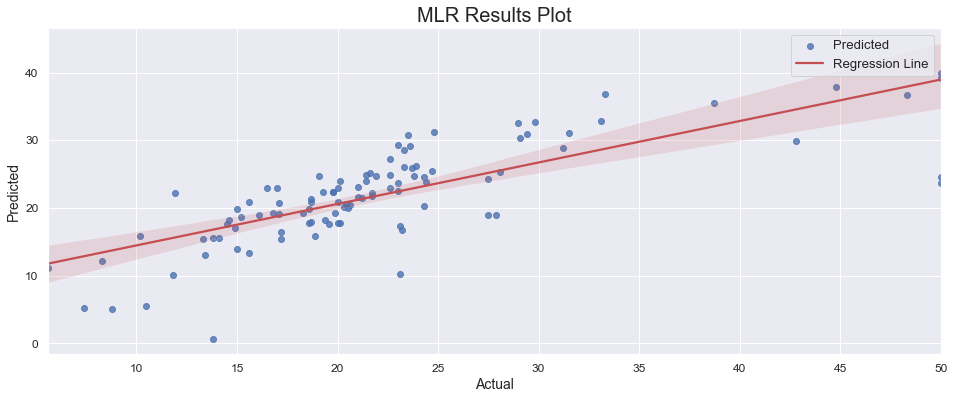

In [38]:
fig, ax = plt.subplots(figsize=(16,6))

sns.regplot(x=tablesmlr.Actual, y=tablesmlr.Predicted, data=tablesmlr, line_kws={"color":"r"})
ax.set_title("MLR Results Plot", size=20)
ax.legend(['Predicted','Regression Line'])
plt.show()

**=================================================================================================================**